In [1]:
#!~/.conda/envs/lra/bin/python3
import os
import sys
import re
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import defaultdict 
import numpy as np
import edlib
import math
import matplotlib.ticker as ticker


path = "/project/mchaisso_100/cmb-16/jingwenr/trfCall/revision"

In [2]:
def VNTR_intersect(genome_sizes):
    l = len(genome_sizes)
    vntr_set_list = [set() for i in range(l)]
    
    for i, genomeSize in enumerate(genome_sizes):
        # read original motif file 
        file = f"{path}/vntr_motif_database/out-{genomeSize}/original_adjusted/vntr_motifs.bed"
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                line = line.rstrip("\n")
                fields = line.split('\t')
                chrom, start, end = fields[:3]
                vntr = f"{chrom}_{start}-{end}"
                vntr_set_list[i].add(vntr)
    return set.intersection(*vntr_set_list)

In [3]:
def update_data_dict(delta, genome_size, omotif_size, emotif_size, vntr_size, avg_omtifs_size, avg_emotifs_size, ratio):
    data_dict['delta'].append(delta)
    data_dict['genome_size'].append(genome_size)
    data_dict['omotif_size'].append(omotif_size)
    data_dict['emotif_size'].append(emotif_size)
    data_dict['vntr_size'].append(vntr_size)
    data_dict['avg_omtifs_size'].append(avg_omtifs_size)
    data_dict['avg_emotifs_size'].append(avg_emotifs_size)
    data_dict['ratio'].append(ratio)

In [4]:
def collectInfo(genomeSize):
    vntr2omotif_size = defaultdict(int)
    num_omotif = 0 
    num_vntrs = 0
    
    # read original motif file 
    file = f"{path}/vntr_motif_database/out-{genomeSize}/original_adjusted/vntr_motifs.bed"
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.rstrip("\n")
            fields = line.split('\t')
            chrom, start, end = fields[:3]
            vntr = f"{chrom}_{start}-{end}"
            
            if vntr not in vntr_set:
                continue
                
            num_omotif += len(fields[3].split(','))
            vntr2omotif_size[vntr] = len(fields[3].split(','))
            num_vntrs += 1
    
    update_data_dict("original", genomeSize, num_omotif, num_omotif, \
                     num_vntrs, num_omotif / num_vntrs, \
                     num_omotif / num_vntrs, 1.0)
    
    for delta in ["q-0.1", "q-0.2", "q-0.3"]:
        
        num_emotif = 0
        ratio_sum = 0
        
        # read efficient motif file 
        file = f"{path}/vntr_motif_database/out-{genomeSize}/{delta}_adjusted/vntr_motifs.bed"
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                line = line.rstrip("\n")
                fields = line.split('\t')
                chrom, start, end = fields[:3]
                vntr = f"{chrom}_{start}-{end}"
                
                if vntr not in vntr_set:
                    continue
                
                num_emotif += len(fields[3].split(','))
                ratio_sum += len(fields[3].split(',')) / vntr2omotif_size[vntr]
                
        update_data_dict(delta, genomeSize, num_omotif, num_emotif, \
                         num_vntrs, num_omotif / num_vntrs, \
                         num_emotif / num_vntrs, ratio_sum / num_vntrs)
                

In [5]:
genomeSizes = [1, 30, 60, 64, 90, 120, 148]
data_dict = {"delta" : [], \
             "genome_size": [], \
             "omotif_size" : [], \
             "emotif_size" : [], \
             "vntr_size" : [], \
             "avg_omtifs_size" : [], \
             "avg_emotifs_size" : [], \
             "ratio" : [] \
            }

vntr_set = VNTR_intersect(genomeSizes)

print(f"vntr_set size: {len(vntr_set)}")

for genomeSize in genomeSizes:
    collectInfo(genomeSize)

vntr_set size: 359760


In [6]:
df = pd.DataFrame(data_dict) 
df

,delta,genome_size,omotif_size,emotif_size,vntr_size,avg_omtifs_size,avg_emotifs_size,ratio
0,original,1,1372241,1372241,359760,3.814323,3.814323,1.000000
1,q-0.1,1,1372241,1237627,359760,3.814323,3.440146,0.970736
2,q-0.2,1,1372241,1045435,359760,3.814323,2.905923,0.892921
3,q-0.3,1,1372241,887543,359760,3.814323,2.467042,0.817076
4,original,30,2463774,2463774,359760,6.848382,6.848382,1.000000
5,q-0.1,30,2463774,1554613,359760,6.848382,4.321250,0.849966
6,q-0.2,30,2463774,1157712,359760,6.848382,3.218012,0.745118
7,q-0.3,30,2463774,917450,359760,6.848382,2.550172,0.680310
8,original,60,2802854,2802854,359760,7.790899,7.790899,1.000000
9,q-0.1,60,2802854,1571205,359760,7.790899,4.367370,0.815605


In [7]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

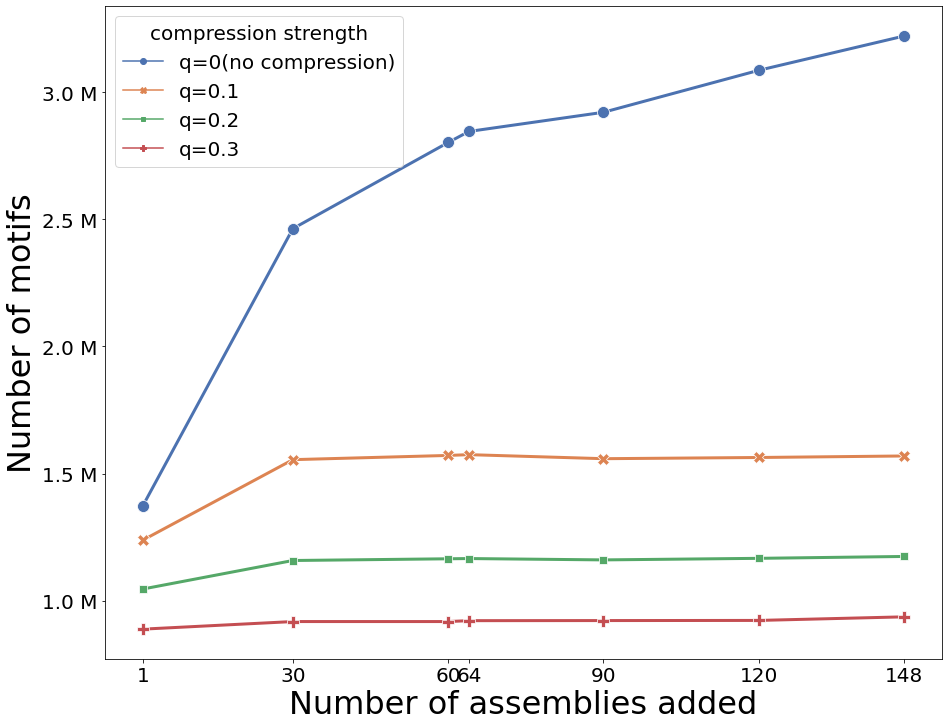

In [16]:
plt.figure(figsize=(15, 12))

ax = sns.lineplot(data=df, x="genome_size", y="emotif_size", \
                  hue="delta", style="delta", palette="deep", \
                  markers=True, dashes=False, lw=3, markersize=12)
# plt.ylim([100000, 3700000])
plt.xlabel('Number of assemblies added', fontsize=32)
plt.ylabel('Number of motifs', fontsize=32)
ax.set_xticks([1, 30, 60, 64, 90, 120, 148])
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.yaxis.set_major_formatter(million_formatter)
ax.yaxis.offsetText.set_fontsize(20)
handles, labels = ax.get_legend_handles_labels()
# update labels
for i in range(len(labels)):
    if labels[i] == 'original':
        labels[i] = 'q=0(no compression)'
    else:
        labels[i] = 'q=' + labels[i][2:]
legend = ax.legend(handles=handles, labels=labels, title="compression strength",fontsize=20, fancybox=True)
plt.setp(legend.get_title(),fontsize=20)
plt.savefig(f"{path}/plot/emotifs_genomesize_overall.png", dpi=300,  bbox_inches = 'tight')


plt.show()  
plt.close()



# num of vntrs

In [9]:
df.loc[df['delta'] == 'q-0.1']

,delta,genome_size,omotif_size,emotif_size,vntr_size,avg_omtifs_size,avg_emotifs_size,ratio
1,q-0.1,1,1372241,1237627,359760,3.814323,3.440146,0.970736
5,q-0.1,30,2463774,1554613,359760,6.848382,4.321250,0.849966
9,q-0.1,60,2802854,1571205,359760,7.790899,4.367370,0.815605
13,q-0.1,64,2846221,1574316,359760,7.911444,4.376017,0.812050
17,q-0.1,90,2921746,1558402,359760,8.121375,4.331782,0.803359
21,q-0.1,120,3086862,1563124,359760,8.580337,4.344908,0.789646
25,q-0.1,148,3221447,1569081,359760,8.954434,4.361466,0.779266


In [10]:
df.loc[df['delta'] == 'original']

,delta,genome_size,omotif_size,emotif_size,vntr_size,avg_omtifs_size,avg_emotifs_size,ratio
0,original,1,1372241,1372241,359760,3.814323,3.814323,1.0
4,original,30,2463774,2463774,359760,6.848382,6.848382,1.0
8,original,60,2802854,2802854,359760,7.790899,7.790899,1.0
12,original,64,2846221,2846221,359760,7.911444,7.911444,1.0
16,original,90,2921746,2921746,359760,8.121375,8.121375,1.0
20,original,120,3086862,3086862,359760,8.580337,8.580337,1.0
24,original,148,3221447,3221447,359760,8.954434,8.954434,1.0


# % original motifs are added after 64 genomes

In [11]:
g = 30
size = list(df.loc[(df['genome_size'] == g) & (df['delta'] == 'q-0.1')]['omotif_size']) 
size_full = list(df.loc[(df['genome_size'] == 148) & (df['delta'] == 'q-0.1')]['omotif_size'])

print(size[0], size_full[0])
print("% original motifs are added after 64 genomes")
print([size[i] / size_full[i] for i in range(len(size_full))])

2463774 3221447
% original motifs are added after 64 genomes
[0.7648035184188968]


# % efficient motifs are added after 64 genomes

In [12]:
g = 30
size = list(df.loc[(df['genome_size'] == g) & (df['delta'] == 'q-0.1')]['emotif_size']) 
size_full = list(df.loc[(df['genome_size'] == 148) & (df['delta'] == 'q-0.1')]['emotif_size'])

print(size[0], size_full[0])
print("% efficient motifs are added after 64 genomes")
print([size[i] / size_full[i] for i in range(len(size_full))])

1554613 1569081
% efficient motifs are added after 64 genomes
[0.9907793160455068]


# Average original/efficient motif set size 

In [13]:
print("original average omoitf size", df.loc[(df['delta'] == "original") & (df['genome_size'] == 148)]['avg_omtifs_size'])
print()


print("q-0.1 average emoitf size", df.loc[(df['delta'] == "q-0.1") & (df['genome_size'] == 148)]['avg_emotifs_size'])
print()


print("q-0.2 average emoitf size", df.loc[(df['delta'] == "q-0.2") & (df['genome_size'] == 148)]['avg_emotifs_size'])
print()


print("q-0.3 average emoitf size", df.loc[(df['delta'] == "q-0.3") & (df['genome_size'] == 148)]['avg_emotifs_size'])
print()

original average omoitf size 24    8.954434
Name: avg_omtifs_size, dtype: float64

q-0.1 average emoitf size 25    4.361466
Name: avg_emotifs_size, dtype: float64

q-0.2 average emoitf size 26    3.262189
Name: avg_emotifs_size, dtype: float64

q-0.3 average emoitf size 27    2.601601
Name: avg_emotifs_size, dtype: float64



# Median  motif set ratio

In [14]:
print("original average ratio", df.loc[(df['delta'] == "original") & (df['genome_size'] == 148)]['ratio'].mean())
print("q-0.1 average ratio", df.loc[(df['delta'] == "q-0.1") & (df['genome_size'] == 148)]['ratio'].mean())
print("q-0.2 quantile average ratio", df.loc[(df['delta'] == "q-0.2") & (df['genome_size'] == 148)]['ratio'].mean())
print("q-0.3 quantile average ratio", df.loc[(df['delta'] == "q-0.3") & (df['genome_size'] == 148)]['ratio'].mean())

original average ratio 1.0
q-0.1 average ratio 0.7792664095419612
q-0.2 quantile average ratio 0.685881252758694
q-0.3 quantile average ratio 0.6267670678001857
